In [166]:
import numpy as np
import matplotlib.pyplot as plt
from quimb import *
from scipy import sparse
from quimb.linalg.base_linalg import *

In [167]:
n = 8 #Number of qubits

P = np.random.choice([-1,1],size=(n,n))
J = (P + P.T)/2

In [168]:
J #Interactions

array([[ 1., -1.,  0.,  0.,  0.,  0., -1.,  0.],
       [-1.,  1.,  1.,  1.,  0.,  1.,  1., -1.],
       [ 0.,  1.,  1.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  1.,  0.,  1., -1.,  0.,  0.,  1.],
       [ 0.,  0.,  0., -1.,  1.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  1.,  1.,  0.,  1.],
       [-1.,  1.,  0.,  0.,  0.,  0.,  1.,  1.],
       [ 0., -1.,  1.,  1.,  0.,  1.,  1., -1.]])

In [169]:
I, X, Y, Z = (pauli(s) for s in 'IXYZ')

In [170]:
def dis_ising(J,n):
    N = 2**n # DImension of hilbert space
    H = np.zeros((N,N))
    for i in range(n):
        for j in range(n):
            H = H + J[i,j]*ikron(Z,dims = [2]*n,inds = [i,j])
    return H
    

In [171]:
DIS = dis_ising(J,n)

In [172]:
gs = groundstate(DIS)

In [173]:
print(np.shape(gs))

(256, 1)


In [174]:
tlist = np.linspace(0,1,100)

In [175]:
tlist

array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
       0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
       0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
       0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
       0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
       0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
       0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
       0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
       0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
       0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
       0.60606061, 0.61616162, 0.62626263, 0.63636364, 0.64646465,
       0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
       0.70707071, 0.71717172, 0.72727273, 0.73737374, 0.74747

In [176]:
E = np.zeros((len(tlist),n))

In [183]:
from scipy.linalg import expm
state = np.random.randn((N))
dt = tlist[2]-tlist[1]
for i in range(len(tlist)):
    for j in range(n):
        rho_reduced = ptr(state, dims = [2]*n, keep = [j])
        E[i,j] = entropy(rho_reduced)
    state = expm(-1J*DIS*dt)@state

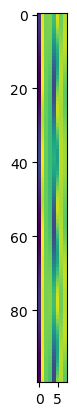

In [184]:
plt.imshow(E)